In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# 2. Load and Preprocess the Dataset
# Load dataset
data = pd.read_csv("../RNN/spam.csv", encoding='ISO-8859-1')
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Preprocessing: Tokenization, Stop Words Removal, and Lowercasing
# Convert all text to lowercase.
# Tokenize the text and remove stop words.
# Convert labels (Spam or Ham) into binary values (1 for Spam, 0 for Ham).# 

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
data['message'] = data['message'].apply(preprocess_text)

# Convert labels to binary
data['class'] = data['class'].apply(lambda x: 1 if x == 'spam' else 0)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data

,class,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though
...,...,...
5567,1,2nd time tried 2 contact u pound prize 2 claim...
5568,0,b going esplanade fr home
5569,0,pity mood suggestions
5570,0,guy bitching acted like interested buying some...


In [5]:
data['class'] 

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: class, Length: 5572, dtype: int64

In [6]:
# Tokenization and Padding
# Convert text data into numerical sequences and pad them to a fixed length for input to the RNN.
# Tokenize and pad the sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['message'])
sequences = tokenizer.texts_to_sequences(data['message'])
X = pad_sequences(sequences, maxlen=max_len)

y = data['class'].values


In [7]:
data

,class,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though
...,...,...
5567,1,2nd time tried 2 contact u pound prize 2 claim...
5568,0,b going esplanade fr home
5569,0,pity mood suggestions
5570,0,guy bitching acted like interested buying some...


In [8]:
# 3. Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# 4. Build and Train the RNN Model
# We’ll use an LSTM (a type of RNN) for this text classification task. LSTM is generally suitable for text data because it can capture dependencies over sequences.
# Define the model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8403 - loss: 0.4183 - val_accuracy: 0.9585 - val_loss: 0.1831
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9716 - loss: 0.1206 - val_accuracy: 0.9787 - val_loss: 0.0806
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9887 - loss: 0.0373 - val_accuracy: 0.9821 - val_loss: 0.0734
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9940 - loss: 0.0254 - val_accuracy: 0.9798 - val_loss: 0.0887
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9965 - loss: 0.0130 - val_accuracy: 0.9798 - val_loss: 0.0867


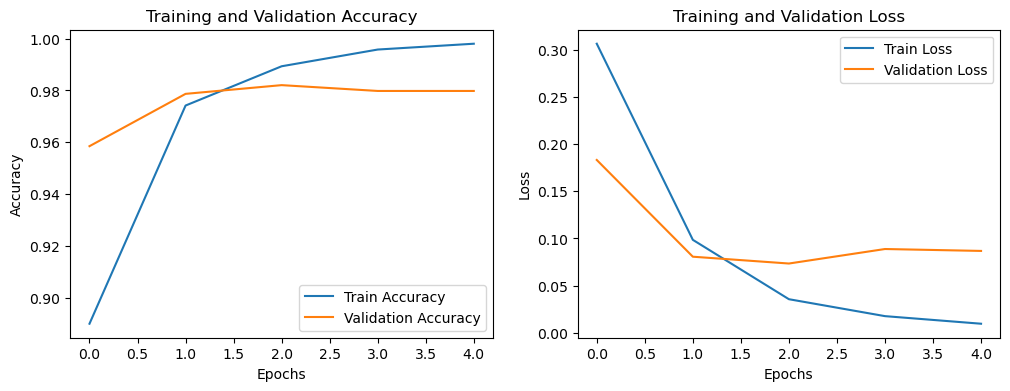

In [10]:
# 5. Monitor Training Progress
# During training, we can observe the accuracy and loss metrics. After each epoch, history will store these metrics.
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [11]:
# 6. Evaluate the Model on Testing Data
# Use the testing set to evaluate model performance and calculate metrics.
# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Accuracy: 0.97
Precision: 0.89
Recall: 0.90
F1 Score: 0.89


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98       965
        Spam       0.89      0.90      0.89       150

    accuracy                           0.97      1115
   macro avg       0.94      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



`Accuracy (0.97): The model correctly classified 97% of the test emails as either "spam" or "ham," which is a strong overall indicator of performance.
Precision (0.89): Of all the emails the model classified as "Spam," 89% were indeed spam. This metric is crucial in spam detection to avoid marking legitimate emails (ham) as spam.
Recall (0.90): The model correctly identified 90% of actual spam emails. High recall is beneficial to ensure that spam emails aren’t missed.
F1 Score (0.89): The F1 score, a balance between precision and recall, shows strong performance in both identifying spam correctly and avoiding false positives.